# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

import utilities

## Load data

In [2]:
input_file = '../data/data_multivar.txt'
X, Y = utilities.load_data(input_file)

In [3]:
class_0 = np.array([X[i] for i in range(len(X)) if Y[i]==0])
class_1 = np.array([X[i] for i in range(len(X)) if Y[i]==1])

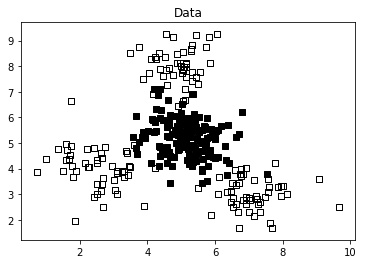

In [4]:
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], facecolors='black', edgecolors='black', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], facecolors='None', edgecolors='black', marker='s')
plt.title('Data')
plt.show()

## Train-test split

In [5]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)

In [6]:
# params = {'kernel': 'linear'}
# params = {'kernel': 'poly', 'degree': 3}
params = {'kernel': 'rbf'}

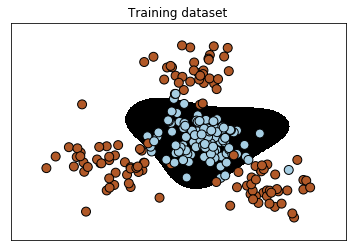

In [7]:
classifier = SVC(**params)
classifier.fit(X_train, y_train)
utilities.plot_classifier(classifier, X_train, y_train, 'Training dataset')

## Prediction

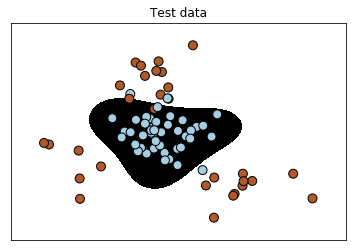

In [8]:
y_test_pred = classifier.predict(X_test)
utilities.plot_classifier(classifier, X_test, y_test, 'Test data')

## Evaluation

In [9]:
from sklearn.metrics import classification_report

target_names = ['Class-' + str(int(i)) for i in set(Y)]
print("\n" + "#"*30)
print( "\nClassifier performance on training dataset\n")
print( classification_report(y_train, classifier.predict(X_train), target_names=target_names))
print("#"*30 + "\n")

print("#"*30)
print("\nClassification report on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=target_names))
print( "#"*30 + "\n")


##############################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.95      0.98      0.97       105
    Class-1       0.98      0.96      0.97       120

avg / total       0.97      0.97      0.97       225

##############################

##############################

Classification report on test dataset

             precision    recall  f1-score   support

    Class-0       0.95      0.93      0.94        45
    Class-1       0.90      0.93      0.92        30

avg / total       0.93      0.93      0.93        75

##############################



# Class imbalances

In [10]:
input_file = '../data/data_multivar_imbalance.txt'
X, Y = utilities.load_data(input_file)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=5)

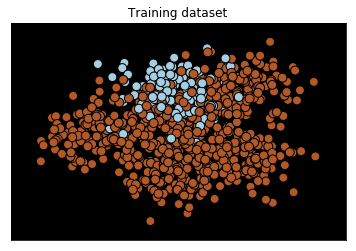

In [11]:
params = {'kernel': 'linear'}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
utilities.plot_classifier(classifier, X_train, y_train, 'Training dataset')

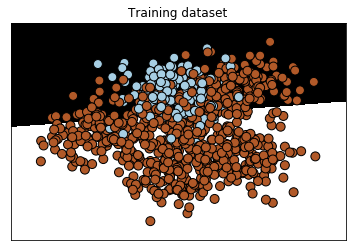

In [12]:
params = {'kernel': 'linear', 'class_weight': 'balanced'}
classifier = SVC(**params)
classifier.fit(X_train, y_train)
utilities.plot_classifier(classifier, X_train, y_train, 'Training dataset')

# Confidence measures

In [14]:
input_datapoints = np.array([[2, 1.5], [8, 9], [4.8, 5.2], [4, 4], [2.5, 7], [7.6, 2], [5.4, 5.9]])
print('\nDistance from the boundary:')
for i in input_datapoints:
    print( i, '-->', classifier.decision_function([i])[0])


Distance from the boundary:
(array([ 2. ,  1.5]), '-->', 3.0608335449981547)
(array([ 8.,  9.]), '-->', -3.4036345183738534)
(array([ 4.8,  5.2]), '-->', -0.14666919736566175)
(array([ 4.,  4.]), '-->', 0.90601085720159436)
(array([ 2.5,  7. ]), '-->', -2.1274272514472914)
(array([ 7.6,  2. ]), '-->', 3.2267368518453745)
(array([ 5.4,  5.9]), '-->', -0.74542825883667607)


In [15]:
params = {'kernel': 'rbf', 'probability': True}
classifier = SVC(**params)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
print('\nConfidence measure:')
for i in input_datapoints:
    print( i, '-->', classifier.predict_proba([i])[0])


Confidence measure:
(array([ 2. ,  1.5]), '-->', array([ 0.08910986,  0.91089014]))
(array([ 8.,  9.]), '-->', array([ 0.07709321,  0.92290679]))
(array([ 4.8,  5.2]), '-->', array([ 0.20032733,  0.79967267]))
(array([ 4.,  4.]), '-->', array([ 0.04970488,  0.95029512]))
(array([ 2.5,  7. ]), '-->', array([ 0.38159802,  0.61840198]))
(array([ 7.6,  2. ]), '-->', array([ 0.0745099,  0.9254901]))
(array([ 5.4,  5.9]), '-->', array([ 0.7037885,  0.2962115]))


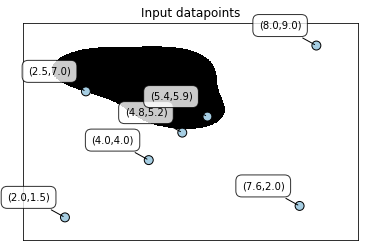

In [17]:
utilities.plot_classifier(classifier, input_datapoints, [0]*len(input_datapoints), 'Input datapoints', 'True')
plt.show()

# Optimal hyperparameters

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Set the parameters by cross-validation
parameter_grid = [  {'kernel': ['linear'], 'C': [1, 10, 50, 600]},
                    {'kernel': ['poly'], 'degree': [2, 3]},
                    {'kernel': ['rbf'], 'gamma': [0.01, 0.001], 'C': [1, 10, 50, 600]},
                 ]

In [26]:
metrics = ['precision', 'recall_weighted']

In [30]:
for metric in metrics:
    print '\n#### Searching optimal hyperparameters for', metric

    classifier = GridSearchCV(SVC(C=1),
            parameter_grid, cv=5, scoring=metric)
    classifier.fit(X_train, y_train)

    print '\nScores across the parameter grid:'
    for params, avg_score, _ in classifier.grid_scores_:
        print( params, '-->', round(avg_score, 3))

    print '\nHighest scoring parameter set:', classifier.best_params_
    y_true, y_pred = y_test, classifier.predict(X_test)
    print '\nFull performance report:\n'
    print classification_report(y_true, y_pred)


#### Searching optimal hyperparameters for precision

Scores across the parameter grid:
({'kernel': 'linear', 'C': 1}, '-->', 0.829)
({'kernel': 'linear', 'C': 10}, '-->', 0.829)
({'kernel': 'linear', 'C': 50}, '-->', 0.829)
({'kernel': 'linear', 'C': 600}, '-->', 0.829)
({'kernel': 'poly', 'degree': 2}, '-->', 0.874)
({'kernel': 'poly', 'degree': 3}, '-->', 0.872)
({'kernel': 'rbf', 'C': 1, 'gamma': 0.01}, '-->', 0.83)
({'kernel': 'rbf', 'C': 1, 'gamma': 0.001}, '-->', 0.824)
({'kernel': 'rbf', 'C': 10, 'gamma': 0.01}, '-->', 0.9)
({'kernel': 'rbf', 'C': 10, 'gamma': 0.001}, '-->', 0.824)
({'kernel': 'rbf', 'C': 50, 'gamma': 0.01}, '-->', 0.913)
({'kernel': 'rbf', 'C': 50, 'gamma': 0.001}, '-->', 0.837)
({'kernel': 'rbf', 'C': 600, 'gamma': 0.01}, '-->', 0.921)
({'kernel': 'rbf', 'C': 600, 'gamma': 0.001}, '-->', 0.896)

Highest scoring parameter set: {'kernel': 'rbf', 'C': 600, 'gamma': 0.01}

Full performance report:

             precision    recall  f1-score   support

        0.

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)



Scores across the parameter grid:
({'kernel': 'linear', 'C': 1}, '-->', 0.827)
({'kernel': 'linear', 'C': 10}, '-->', 0.827)
({'kernel': 'linear', 'C': 50}, '-->', 0.827)
({'kernel': 'linear', 'C': 600}, '-->', 0.827)
({'kernel': 'poly', 'degree': 2}, '-->', 0.851)
({'kernel': 'poly', 'degree': 3}, '-->', 0.85)
({'kernel': 'rbf', 'C': 1, 'gamma': 0.01}, '-->', 0.829)
({'kernel': 'rbf', 'C': 1, 'gamma': 0.001}, '-->', 0.824)
({'kernel': 'rbf', 'C': 10, 'gamma': 0.01}, '-->', 0.872)
({'kernel': 'rbf', 'C': 10, 'gamma': 0.001}, '-->', 0.824)
({'kernel': 'rbf', 'C': 50, 'gamma': 0.01}, '-->', 0.881)
({'kernel': 'rbf', 'C': 50, 'gamma': 0.001}, '-->', 0.831)
({'kernel': 'rbf', 'C': 600, 'gamma': 0.01}, '-->', 0.89)
({'kernel': 'rbf', 'C': 600, 'gamma': 0.001}, '-->', 0.871)

Highest scoring parameter set: {'kernel': 'rbf', 'C': 600, 'gamma': 0.01}

Full performance report:

             precision    recall  f1-score   support

        0.0       0.64      0.55      0.59        42
        1.

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
